In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 14 #

Box contains cards labeled R, B, and G. I **draw two cards at random without replacement**.

### Chance of two events both occurring ###
What is the chance that I get G followed by B?

(both "get G first" and "get B second")

In [2]:
1/3 * 1/2

0.16666666666666666

### Chance of an event that can happen in multiple ways ###
What is the chance that one of the ticket is G and the other is B?

In [3]:
1/3 * 1/2 + 1/3 * 1/2

0.3333333333333333

### Challenge Question 1 ###

**Without calculation:** What is the chance that the second card drawn is B?

In [4]:
1/3 * 1/2 + 1/3 * 1/2

0.3333333333333333

### Challenge Question 2 ###

I have a deck of 52 cards. It contains four aces, one of which is the ace of hearts.

I shuffle the deck and deal 13 cards. 

**Without calculation:** What is the chance that the 12th card is the ace of hearts?

### Chance of At Least One Success in Independently Repeated Success/Failure Trials ###

In [5]:
# Chance of no sixes in 4 rolls of a die

prob_no_sixes_in_four_rolls = (5/6)**4
prob_no_sixes_in_four_rolls

0.4822530864197532

In [6]:
# Chance of at least one six in 4 rolls of a die
1 - prob_no_sixes_in_four_rolls

0.5177469135802468

In [7]:
# Chance of at least one six in n rolls of a die

rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


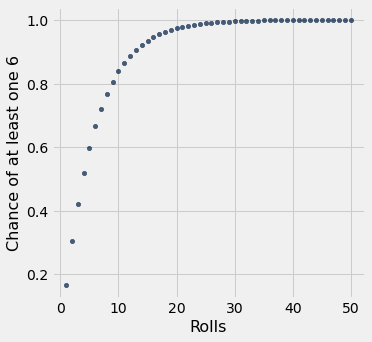

In [8]:
results.scatter('Rolls')

### The Monty Hall Problem ###

In [9]:
goats = make_array('first goat', 'second goat')

In [10]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [11]:
other_goat('first goat'), other_goat('second goat'), other_goat('truck')

('second goat', 'first goat', None)

In [12]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [13]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [14]:
monty_hall_game()

['first goat', 'second goat', 'car']

In [15]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())


In [16]:
games.show(3)

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
car,second goat,first goat


In [17]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3348
first goat,3248
second goat,3404


In [18]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6652
first goat,1632
second goat,1716


In [19]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3348,6652
first goat,3248,1632
second goat,3404,1716


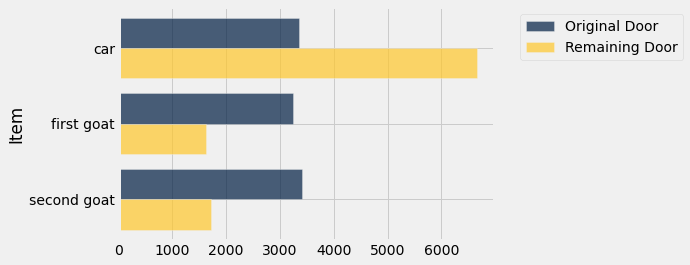

In [20]:
combined.barh(0)